In [1]:
import warnings
import read_geolife

from pandas.errors import SettingWithCopyWarning

# Ignore futuewarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)


In [2]:
df = read_geolife.read_all_users('../Data/')

[1/183] processing user 018
[2/183] processing user 172
[3/183] processing user 145
[4/183] processing user 001
[5/183] processing user 069
[6/183] processing user 083
[7/183] processing user 072
[8/183] processing user 050
[9/183] processing user 040
[10/183] processing user 014
[11/183] processing user 154
[12/183] processing user 150
[13/183] processing user 178
[14/183] processing user 141
[15/183] processing user 047
[16/183] processing user 109
[17/183] processing user 067
[18/183] processing user 176
[19/183] processing user 137
[20/183] processing user 131
[21/183] processing user 019
[22/183] processing user 102
[23/183] processing user 110
[24/183] processing user 146
[25/183] processing user 049
[26/183] processing user 144
[27/183] processing user 045
[28/183] processing user 161
[29/183] processing user 033
[30/183] processing user 026
[31/183] processing user 118
[32/183] processing user 164
[33/183] processing user 112
ValueError No objects to concatenate in ../Data/labe

#### Visualize using latitude-longitude coordinates

In [3]:
import numpy as np
P = np.c_[df['lon'], df['lat'], np.zeros(len(df))]

In [4]:
import pyvista as pv

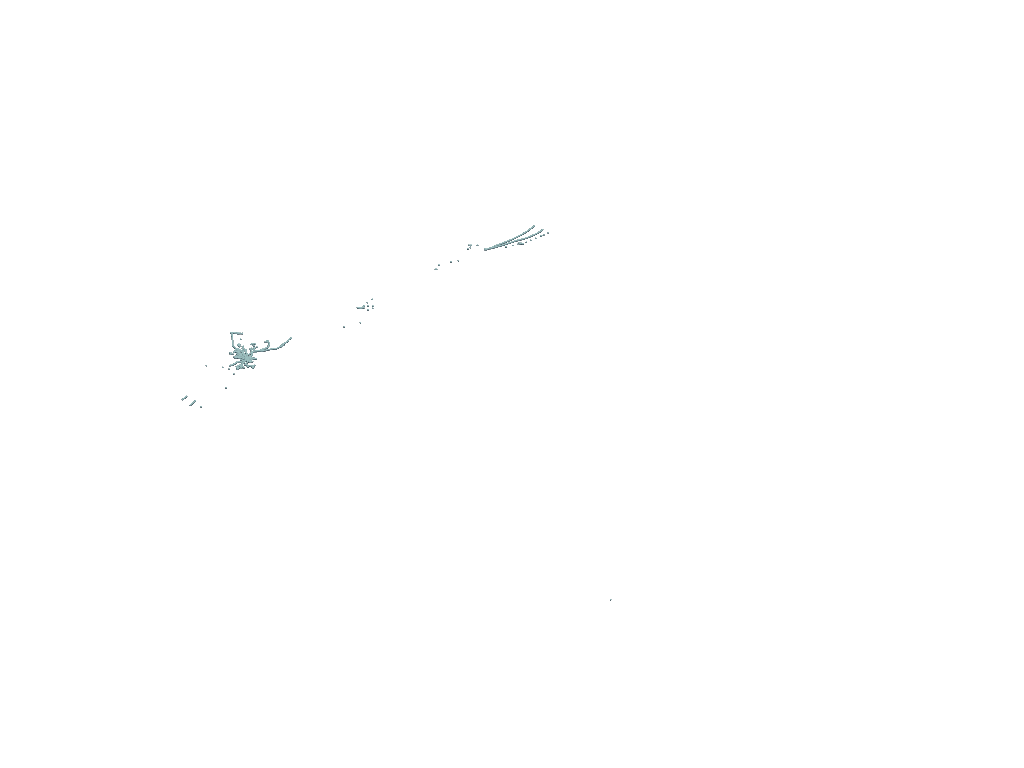

In [5]:
poly = pv.PolyData(P)
plotter = pv.Plotter()
_ = plotter.add_mesh(poly, render_points_as_spheres=True, point_size=2.0)
plotter.show()

#### Visualize using UTM coordinates

In [6]:
mask_50 = (df['lon'] > 114.0) & (df['lon'] < 120.0) & (df['lat'] > 32.0) & (df['lat'] < 48.0)
df_50 = df[mask_50]

In [7]:
import pyproj

proj = pyproj.Proj(proj='utm', zone=50, ellps='WGS84')
x, y = proj(df_50['lon'].values, df_50['lat'].values)
p = np.c_[x, y, 0.3048 * df_50['alt'].values]

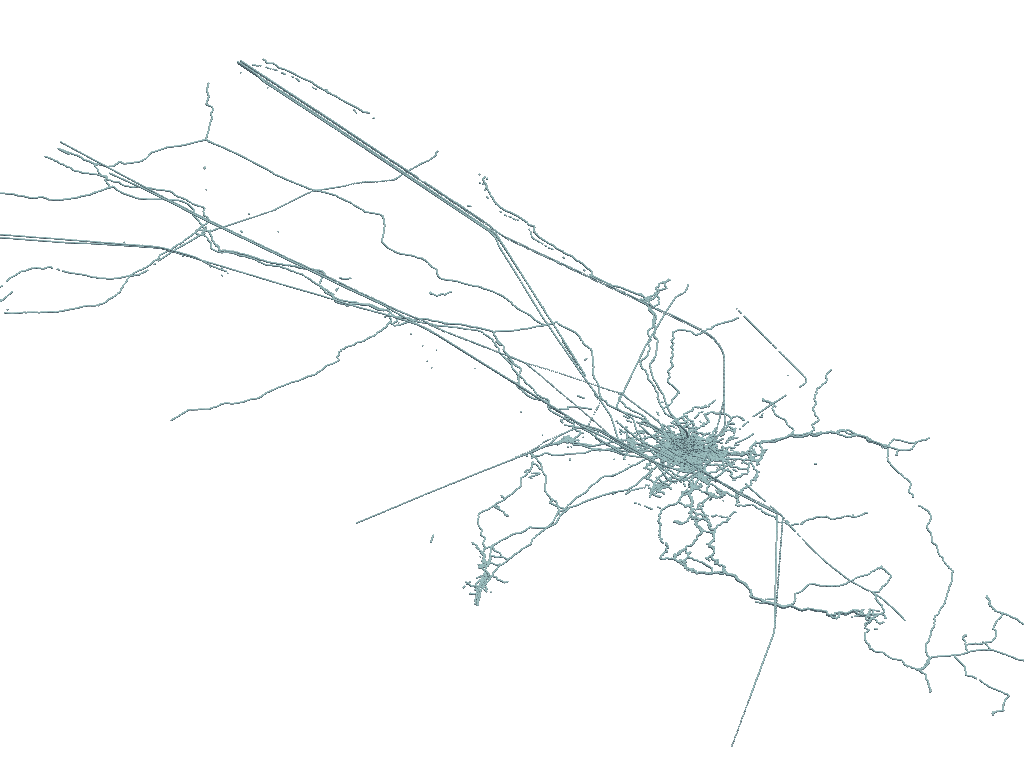

In [8]:
poly = pv.PolyData(p)
plotter = pv.Plotter()
_ = plotter.add_mesh(poly, render_points_as_spheres=True, point_size=2.0)
plotter.camera.zoom(2.0)
plotter.show()